In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# Fill 'Age' with median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill 'Embarked' with mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' (too many missing values)
titanic.drop(columns=['Cabin'], inplace=True)


<ipython-input-6-1162985053>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
<ipython-input-6-1162985053>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

([<matplotlib.axis.XTick at 0x7ce2753736d0>,
 [Text(0, 0, 'Did Not Survive'), Text(1, 0, 'Survived')])

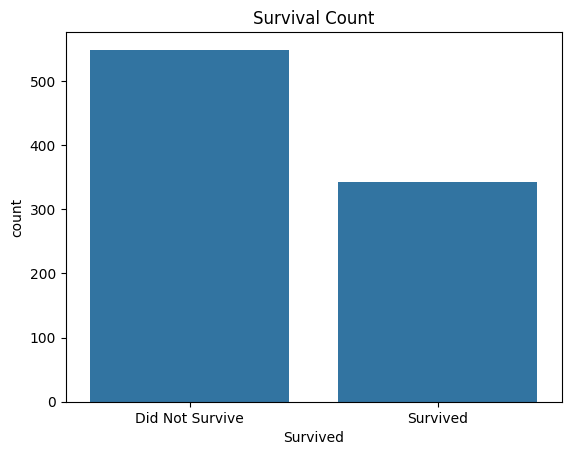

In [7]:
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])

Text(0.5, 1.0, 'Survival by Gender')

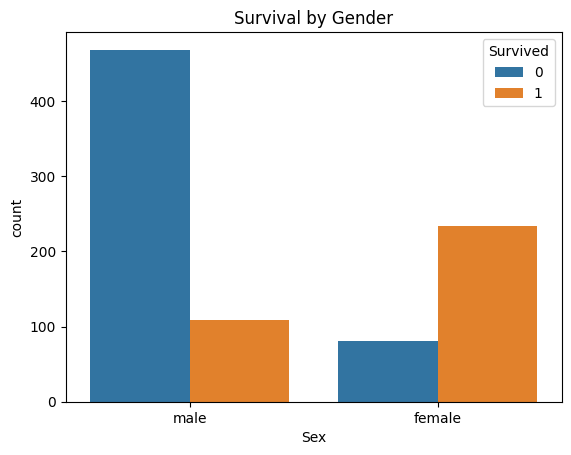

In [8]:
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival by Gender')

Text(0.5, 1.0, 'Survival by Passenger Class')

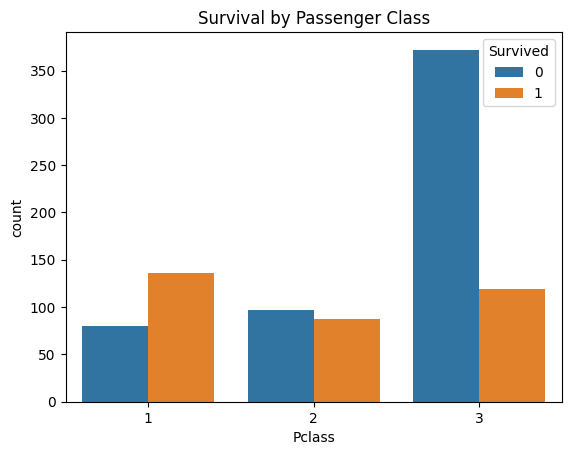

In [9]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival by Passenger Class')

Text(0.5, 1.0, 'Age Distribution')

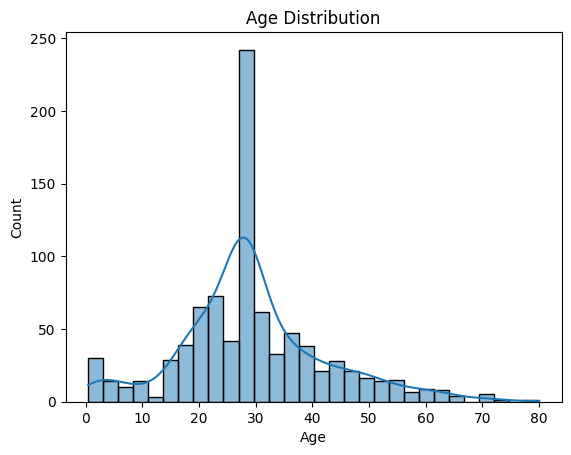

In [10]:
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Age vs Survival')

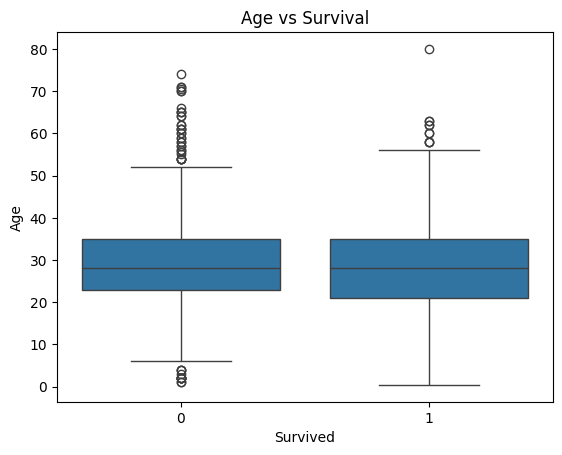

In [11]:
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age vs Survival')

In [12]:
titanic.to_csv('cleaned_titanic.csv', index=False)